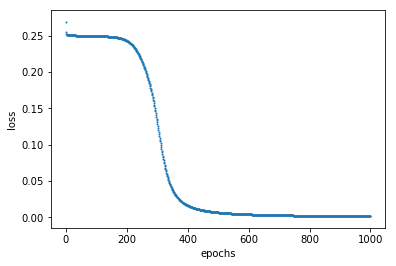

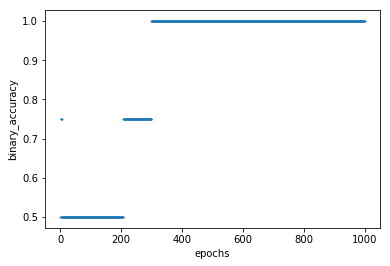

In [83]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

training_data = pd.DataFrame([
    {'a': 0, 'b': 0, 'result': 0},
    {'a': 0, 'b': 1, 'result': 1},
    {'a': 1, 'b': 0, 'result': 1},
    {'a': 1, 'b': 1, 'result': 0}
], dtype='float32')

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_dim=2, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(
    optimizer=tf.train.GradientDescentOptimizer(3),
    loss=tf.keras.losses.mean_squared_error,
    metrics=['binary_accuracy'])

history = model.fit(
    x=training_data[['a', 'b']].values, 
    y=training_data[['result']].values, 
    epochs=1000, 
    verbose=0)

for key in history.history.keys():
    values = history.history[key]
    plt.scatter(range(len(values)), values, s=1)
    plt.ylabel(key)
    plt.xlabel('epochs')
    plt.show()

In [84]:
predictions = pd.DataFrame(model.predict(data[['a', 'b']]) >= 0.5, columns=['predicted'])
pd.concat([
    data >= 0.5,
    predictions
], axis=1)

,a,b,result,predicted
0,False,False,False,False
1,False,True,True,True
2,True,False,True,True
3,True,True,False,False
